Importing libreries and data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
match_data = pd.read_excel(r"2024_LoL_esports_match_data_from_OraclesElixir.xlsx")
match_data.head(5)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing which columns have many empty cells.

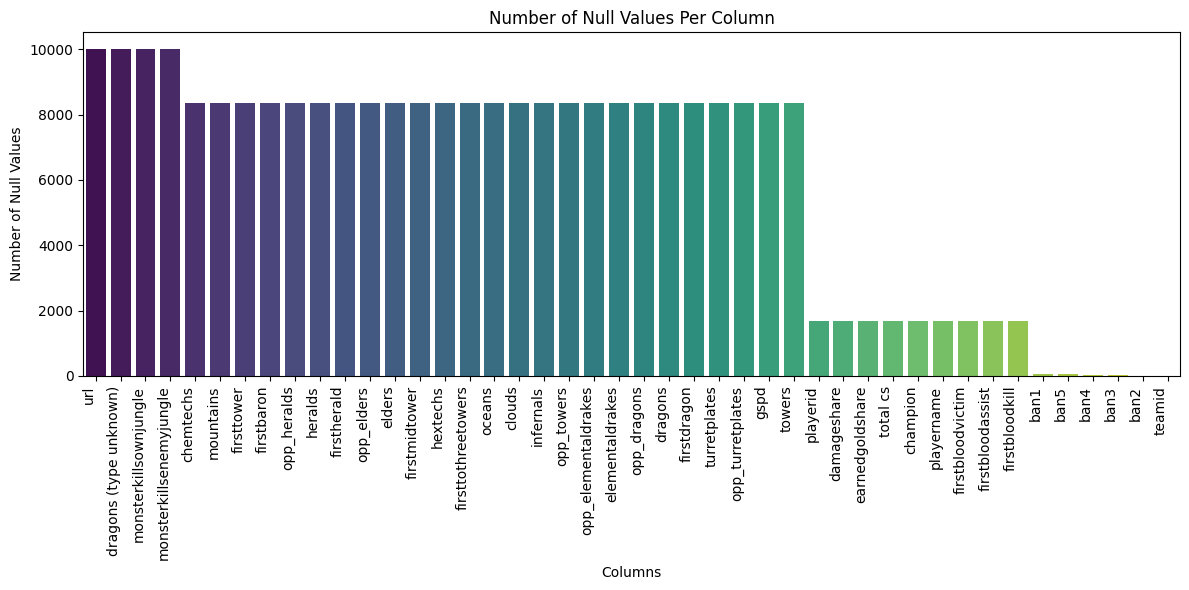

In [3]:
complete_data = match_data[match_data['datacompleteness'] == 'complete']
null_count = complete_data.isnull().sum()
null_count = null_count[null_count > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=null_count.index, y=null_count.values, hue=null_count.index, palette='viridis', legend=False)
plt.title('Number of Null Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Deleting columns which have many empty cells. Also ther are rows which are team data. Delete those and leftover rows with empty cells.

In [4]:
clean_data = complete_data.drop(columns=null_count[null_count > 3000].index)
player_data = clean_data[clean_data['position'] != 'team'].dropna()
player_data

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
216,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,1,...,135.0,1690.0,-346.0,-1.0,2.0,1.0,1.0,0.0,1.0,2.0
217,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,2,...,95.0,-378.0,74.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0
218,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,3,...,152.0,279.0,-330.0,-16.0,1.0,0.0,0.0,0.0,1.0,0.0
219,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,4,...,109.0,213.0,1319.0,17.0,2.0,1.0,2.0,3.0,1.0,2.0
220,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,5,...,23.0,-75.0,-1313.0,-8.0,0.0,3.0,2.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,LOLTMNT01_55111,complete,LCO,2024,Split 1,0,2024-02-13 10:28:54,2,14.02,6,...,133.0,1122.0,662.0,11.0,2.0,1.0,0.0,0.0,1.0,1.0
12270,LOLTMNT01_55111,complete,LCO,2024,Split 1,0,2024-02-13 10:28:54,2,14.02,7,...,77.0,1019.0,1030.0,23.0,3.0,1.0,2.0,0.0,4.0,0.0
12271,LOLTMNT01_55111,complete,LCO,2024,Split 1,0,2024-02-13 10:28:54,2,14.02,8,...,81.0,2087.0,2145.0,61.0,2.0,3.0,2.0,2.0,1.0,4.0
12272,LOLTMNT01_55111,complete,LCO,2024,Split 1,0,2024-02-13 10:28:54,2,14.02,9,...,106.0,-417.0,-824.0,15.0,2.0,2.0,1.0,4.0,2.0,2.0


'dpm', 'damagetakenperminute', 'damagemitigatedperminute', 'wpm', 'vspm', 'earned gpm', 'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15'

In [5]:
positions = list(player_data['position'].unique())
positions

['top', 'jng', 'mid', 'bot', 'sup']

Let's train logistic regression as a proxy for player performance.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

statspm = ['damageshare', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute', 'wpm', 'vspm', 'earned gpm', 'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15']

player_statspm = player_data[['dpm', 'damagetakenperminute', 'damagemitigatedperminute', 'wpm', 'vspm', 'earned gpm', 'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15']]
results = player_data['result']

reg_dict = {}

for pos in positions:
    print(pos)
    X = player_statspm[player_data['position'] == pos]
    y = results[player_data['position'] == pos]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train, y_train)

    reg_dict[pos] = logreg

    y_pred = logreg.predict(X_test)

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))


top
Accuracy: 0.8268292682926829
Precision: 0.8472906403940886
Recall: 0.8113207547169812
jng
Accuracy: 0.8804878048780488
Precision: 0.8780487804878049
Recall: 0.8823529411764706
mid
Accuracy: 0.8341463414634146
Precision: 0.813953488372093
Recall: 0.8620689655172413
bot
Accuracy: 0.8484107579462102
Precision: 0.8287037037037037
Recall: 0.8774509803921569
sup
Accuracy: 0.9099756690997567
Precision: 0.893719806763285
Recall: 0.925


Adding a column for performence in a game.

In [7]:
player_data['performance'] = np.nan

for pos in positions:
    player_data.loc[player_data['position'] == pos, 'performance'] = reg_dict[pos].predict_proba(player_statspm[player_data['position'] == pos])[:, 1]

player_data['performance']

216      0.011080
217      0.025917
218      0.009097
219      0.132757
220      0.551183
           ...   
12269    0.940602
12270    0.998301
12271    0.999359
12272    0.934147
12273    0.998962
Name: performance, Length: 8191, dtype: float64

Calculating player performence.

In [24]:
best_players = (
    player_data.groupby(['playername', 'league', 'position'])
      .agg(
          performance=('performance', 'mean'),
          matches=('performance', 'count')
      )
      .query('matches >= 5')
      .sort_values('performance', ascending=False)
      .reset_index()
)
best_players

,playername,league,position,performance,matches
0,Bung,ESLOL,bot,0.986299,5
1,Sebekx,LIT,mid,0.985331,5
2,Kikis,LIT,jng,0.983688,5
3,Seal,ESLOL,sup,0.969411,5
4,NOMA,LPLOL,mid,0.927862,6
...,...,...,...,...,...
858,DesoLinee,UL,top,0.029720,7
859,Mazi,UL,jng,0.029659,7
860,Arding,PCS,sup,0.028079,8
861,Kaymin,PRM,mid,0.027994,8


Let's look at best players in some leagues for each position. Players playing in different positions should not be compared.

In [32]:
best_by_league = best_players.loc[best_players.groupby(['position', 'league'])['performance'].idxmax()].reset_index(drop=True)
best_by_league[best_by_league['league'].isin(['LCK', 'LEC', 'PCS'])]

,playername,league,position,performance,matches
4,Gumayusi,LCK,bot,0.876051,14
8,Hans Sama,LEC,bot,0.769315,17
17,Shunn,PCS,bot,0.759626,11
26,Canyon,LCK,jng,0.767866,14
30,Yike,LEC,jng,0.772567,17
39,Gemini,PCS,jng,0.768566,12
48,Chovy,LCK,mid,0.731984,13
52,nuc,LEC,mid,0.667360,16
61,Maple,PCS,mid,0.779319,9
70,Lehends,LCK,sup,0.817859,14


These results are similar to public opinion.